<h1>Regularized Linear Regression and Bias vs. Variance</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

<h3>Loading the data</h3>

In [2]:
#loading in the matlab files 
data = loadmat("Formulas and Datasets/ex5data1.mat")

#seperating the files into test and training sets 
X = data["X"]
y = data["y"]

Xtest = data["Xtest"]
ytest = data["ytest"]

Xval = data["Xval"]
yval = data["yval"]

Text(0.5, 0, 'Change in water level(x)')

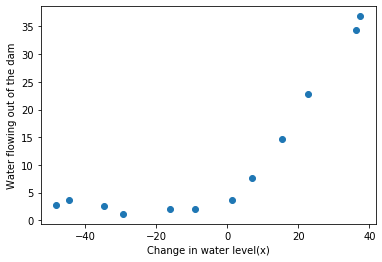

In [3]:
plt.scatter(X, y)
plt.ylabel("Water flowing out of the dam")
plt.xlabel("Change in water level(x)")

<h3>Regularized linear regression cost function</h3>

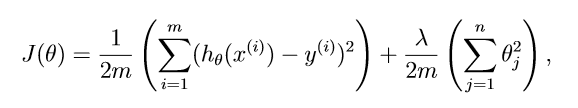

In [4]:
from IPython.display import Image
Image(filename="Formulas and Datasets/Regularized Cost.png")

In [5]:
def regcost(X, y, theta, lmbda):
    temp = X @ theta 
    cost = 1/(2*m) * np.sum((temp - y)**2)
    costreg = cost + (lmbda / (2*m))* np.sum(theta[1:]**2)
    return costreg   

In [6]:
m = X.shape[0]
theta = np.ones((2,1))
ones = np.ones((m,1))

X_1 = np.hstack((ones, X))

cost = regcost(X_1, y, theta, 1)
print("Cost at theta = [1 ; 1]: ", cost)

Cost at theta = [1 ; 1]:  303.9931922202643


<h3>Regularized linear regression gradient</h3>

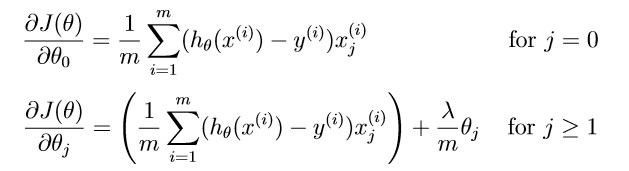

In [7]:
from IPython.display import Image
Image(filename="Formulas and Datasets/Regularized Linear Regression.png")

In [8]:
def regGradient(X, y, theta, lmbda):
    grad1 = 1/m * X.T @ (X @ theta - y)
    grad2 = 1/m * X.T @ (X @ theta - y) + (lmbda/m * theta)
    grad = np.vstack((grad1[0],grad2[1:]))
    return grad

grad = regGradient(X_1, y, theta, 1)
print(grad)

[[-15.30301567]
 [598.25074417]]


In [9]:
def gradientDescent(X, y, theta, lmbda, iterations, alpha):
    costhistory = []
    
    for i in range(iterations):
        cost = regcost(X, y, theta, lmbda)
        grad = regGradient(X, y, theta, lmbda)
        theta = theta - (alpha*grad)
        costhistory.append(cost)
        
    return theta, costhistory

In [10]:


theta, costHistory = gradientDescent(X_1, y, theta, 1, 4000, .001)

<h3>Plotting the Cost Function</h3>

(0, 150)

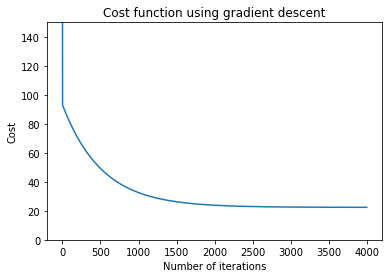

In [11]:
plt.plot(costHistory)
plt.title("Cost function using gradient descent")
plt.ylabel("Cost")
plt.xlabel("Number of iterations")
plt.ylim(0, 150)

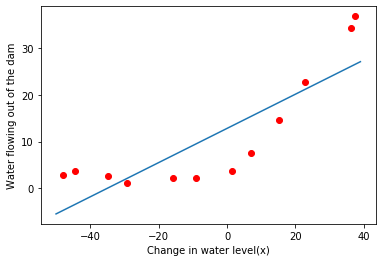

In [12]:
plt.scatter(X, y, color="r")
plt.ylabel("Water flowing out of the dam")
plt.xlabel("Change in water level(x)")

x_val = [x for x in range (-50,40)]
y_val = [y*theta[1] + theta[0] for y in x_val]
plt.plot(x_val, y_val)

<h3>Learning curves</h3>

In [13]:
def learningCurve(X, y, Xval, yval, lmbda):
    
    m = len(y)
    n = X.shape[1]
    trainError, valError = [],[]
    
    for i in range(1, m+1):
        theta = gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),lmbda, 3000,0.001)[0]
        trainError.append(regcost(X[0:i,:], y[0:i,:], theta, lmbda))
        valError.append(regcost(Xval, yval, theta, lmbda))
        
    return trainError, valError



In [14]:
Lambda = 1
Xval_1 = np.hstack((np.ones((21,1)),Xval))
trainError, valError = learningCurve(X_1, y, Xval_1, yval, Lambda)

In [15]:
print("# Training Examples\t Train Error \t\t Cross Validation Error ")
for i in range(1,13):
    print("\t",i,"\t\t",trainError[i-1],"\t",valError[i-1],"\n")

# Training Examples	 Train Error 		 Cross Validation Error 
	 1 		 0.0007371612390440289 	 358.5034079321887 

	 2 		 0.06607887126730966 	 311.3690817848917 

	 3 		 6.4524315339926535 	 122.25106196875622 

	 4 		 6.038509677190553 	 136.320242497331 

	 5 		 10.649094436141642 	 60.9247340508795 

	 6 		 12.813009083573823 	 63.75824308921625 

	 7 		 13.540279012419727 	 62.68630214994774 

	 8 		 13.580789046673727 	 56.586850181981966 

	 9 		 17.78456761230488 	 58.957568022065644 

	 10 		 20.145891984107546 	 53.26526032851029 

	 11 		 22.71663714378501 	 54.857519506894036 

	 12 		 22.62606177348104 	 53.47422019670472 



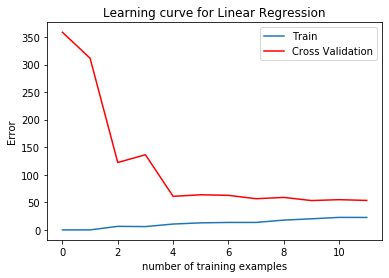

In [16]:
plt.plot(range(12), trainError, label = "Train")
plt.plot(range(12), valError, label="Cross Validation", color="r")
plt.title("Learning curve for Linear Regression")
plt.xlabel("number of training examples")
plt.ylabel("Error")
plt.legend()

<h3>Learning Polynomial Regression</h3>

In [17]:
def polyFeatures(X, p):
    
    for i in range(2, p+1):
        X = np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
        
    return X

In [18]:
#mapping X onto polynomial features and normalizing 
p=8
X_poly = polyFeatures(X, p)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_poly=sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

In [19]:
#Map Xtest onto polynomial features and normalize
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = sc_X.transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)), X_poly_test))

In [20]:
#Map Xval onto polynomail features and normalize
X_poly_val = polyFeatures(Xval, p)
X_poly_val = sc_X.transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

In [21]:
theta = np.zeros((9,1))
alpha = 0.3
iterations = 20000
lmbda = 0

theta_poly, costHistory_poly = gradientDescent(X_poly, y, theta, lmbda, 20000, 0.3)

<h3>Mapping polynomial fit and learning curve</h3>

(-40, 40)

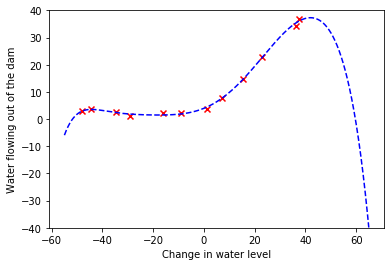

In [22]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.ylim(-40,40)

In [23]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, 0)

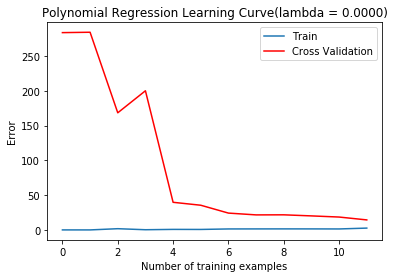

In [24]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Polynomial Regression Learning Curve(lambda = 0.0000)")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

<h3>Adjusting the regularization parameter</h3>

In [25]:
Lambda= 100

newtheta_poly, newcostHistory_poly = gradientDescent(X_poly, y, np.zeros((9,1)), Lambda, 20000, 0.01)

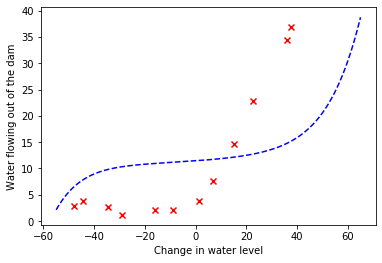

In [26]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ newtheta_poly
plt.plot(x_value,y_value,"--",color="b")